<a href="https://colab.research.google.com/github/thallescotta/instrumentacao-aplicada-processos-fisicos-biologicos-PPGIO-2025-2/blob/main/1st_exercise_Intrumenta%C3%A7%C3%A3o%C2%A02025_Cefet_PPGIO_InstrFis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Imagem alinhada à esquerda -->
<p align="left">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHYOnIACPcb9bCeQQ_wbfF9mp5ADlbCIoghtDM6YiLklaBrtEsAxZ-G-y6N3_PNR_tCmw&usqp=CAU"
       alt="Logo CEFET"
       width="360">   <!-- tamanho da logo -->
</p>

# **Thalles Cotta Fontainha**  —  **PPGIO Matrícula: 2410091DIOAMA**

## *"1st exercise Intrumentação 2025 - Cefet_PPGIO_InstrFis.xlsx"* recebido em 09/09/2025
### **Disciplina**: Instrumentação Aplicada a Processos Físicos e Biológicos  
**Código da disciplina:** IOA6042 – [CEFET/RJ]  
**Professor:** Jesse Costa




In [ ]:
# Bibliotecas essenciais / Essential libraries
import pandas as pd  # data handling
import numpy as np   # numerical ops
import matplotlib.pyplot as plt  # plots

In [ ]:
import pandas as pd

# Oculta "dtype" ao exibir Series (print/display no Colab)
# Hide "dtype" when showing Series (print/display in Colab)
pd.Series.__repr__      = lambda s: s.to_string(dtype=False)
pd.Series._repr_html_   = lambda s: f"<pre>{s.to_string(dtype=False)}</pre>"


In [ ]:
# ===========================================
# Definição das tabelas antes de começar os exercícios
# ===========================================

import pandas as pd
from io import StringIO

# --------------------------
# TABELA 1 – 72 alunos
# --------------------------
raw_tabela1 = """Aluno Idade Massa Altura
1 37 88 183
2 34 68 159
3 18 68 170
4 21 61 164
5 23 50 165
6 25 80 181
7 18 68 168
8 18 80 177
9 21 74 175
10 19 75 175
11 22 66 167
12 19 64 161
13 19 70 176
14 20 71 175
15 19 61 180
16 21 75 175
17 20 65 177
18 17 70 168
19 21 82 184
20 24 95 174
21 24 66 172
22 20 63 184
23 21 60 164
24 18 67 177
25 25 63 172
26 21 82 184
27 17 58 163
28 22 85 179
29 19 75 174
30 21 93 191
31 27 66 172
32 20 54 165
33 19 75 175
34 20 60 177
35 20 88 163
36 18 110 183
37 25 127 185
38 18 68,5 173
39 21 55,5 172
40 25 47,5 160
41 19 78,5 180
42 19 51,5 166
43 20 72,1 172
44 19 83,4 181
45 19 57 172
46 21 83 180
47 33 86 180
48 26 64 173
49 25 83 180
50 20 70 180
51 20 68 168
52 19 58 167
53 22 63 179
54 18 70 175
55 23 98 178
56 19 97 182
57 21 60 177
58 19 60 170
59 21 90 183
60 18 67 167
61 21 63 179
62 19 62 172
63 37 72 183
64 20 82 181
65 20 58 171
66 19 65 176
67 20 52 160
68 22 84 182
69 20 67 169
70 18 62 164
71 22 80 185
72 20 82 181
"""
tabela1 = pd.read_csv(StringIO(raw_tabela1), sep=r"\s+", engine="python", decimal=",")
tabela1.name = "Tabela 1 – Alunos"
print("Tabela 1 carregada:", tabela1.shape, "linhas")
display(tabela1.head())   # DataFrame já sai sem dtype

# --------------------------
# TABELA 2 – 30 larguras
# --------------------------
tabela2 = pd.Series([
    150.3, 150.1, 149.9, 150.2, 150.1, 150.1,
    150.2, 150.1, 150.4, 151.0, 151.1, 150.0,
    150.1, 151.0, 149.9, 149.7, 150.2, 149.2,
    151.5, 150.1, 149.9, 149.2, 149.9, 150.2,
    151.0, 151.0, 150.3, 150.0, 150.0, 150.0
], name="Largura (cm)")
tabela2.name = "Tabela 2 – Bancadas"
print("Tabela 2 carregada:", tabela2.size, "medidas")

# Exibir estatísticas em formato de DataFrame (igual Tabela 1) -> sem dtype
display(pd.DataFrame(tabela2.describe()).T)


Tabela 1 carregada: (72, 4) linhas


,Aluno,Idade,Massa,Altura
0,1,37,88.0,183
1,2,34,68.0,159
2,3,18,68.0,170
3,4,21,61.0,164
4,5,23,50.0,165


Tabela 2 carregada: 30 medidas


,count,mean,std,min,25%,50%,75%,max
Tabela 2 – Bancadas,30.0,150.223333,0.523044,149.2,150.0,150.1,150.3,151.5


Exercício 1 — Tabulação ordenada e agrupada / Ordered & grouped tabulation

**1 – Fazer para cada tabela, a tabulação ordenada e agrupada de acordo com o número de ocorrências contidas**





In [ ]:
# ============================================
# Exercício 1: Tabulação simples e agrupada
# Exercise 1: Ordered counts and grouped frequencies
# ============================================

import numpy as np
import pandas as pd

def freq_tables(series, bins="sturges"):
    # Conta quantas vezes cada valor aparece e ordena
    counts = series.value_counts().sort_index()

    # Regra de Sturges: define automaticamente o número de classes (bins)
    k = bins if isinstance(bins, int) else int(np.ceil(1 + np.log2(series.size)))

    # Agrupa os valores em intervalos (classes) e conta quantos caem em cada um
    grouped = pd.cut(series, bins=k).value_counts().sort_index()

    return counts, grouped


# -------------------------
# Aplicar na Tabela 1 (72 alunos)
# Apply to Table 1 (72 students)
# -------------------------
for col in ["Idade", "Massa", "Altura"]:
    counts, grouped = freq_tables(tabela1[col])

    print(f"\n=== {col} – Contagem ordenada / Ordered counts ===")
    # Converte para DataFrame para evitar 'dtype' na saída
    display(pd.DataFrame(counts))

    print(f"=== {col} – Frequência por classes / Class frequencies ===")
    # Também converte para DataFrame para evitar 'dtype'
    display(pd.DataFrame(grouped))


=== Idade – Contagem ordenada / Ordered counts ===


,count
Idade,
17,2
18,9
19,15
20,14
21,12
22,5
23,2
24,2
25,5


=== Idade – Frequência por classes / Class frequencies ===


,count
Idade,
"(16.98, 19.5]",26
"(19.5, 22.0]",31
"(22.0, 24.5]",4
"(24.5, 27.0]",7
"(27.0, 29.5]",0
"(29.5, 32.0]",0
"(32.0, 34.5]",2
"(34.5, 37.0]",2



=== Massa – Contagem ordenada / Ordered counts ===


,count
Massa,
47.5,1
50.0,1
51.5,1
52.0,1
54.0,1
55.5,1
57.0,1
58.0,3
60.0,4


=== Massa – Frequência por classes / Class frequencies ===


,count
Massa,
"(47.42, 57.438]",7
"(57.438, 67.375]",25
"(67.375, 77.312]",17
"(77.312, 87.25]",14
"(87.25, 97.188]",6
"(97.188, 107.125]",1
"(107.125, 117.062]",1
"(117.062, 127.0]",1



=== Altura – Contagem ordenada / Ordered counts ===


,count
Altura,
159,1
160,2
161,1
163,2
164,3
165,2
166,1
167,3
168,3


=== Altura – Frequência por classes / Class frequencies ===


,count
Altura,
"(158.968, 163.0]",6
"(163.0, 167.0]",9
"(167.0, 171.0]",7
"(171.0, 175.0]",17
"(175.0, 179.0]",11
"(179.0, 183.0]",16
"(183.0, 187.0]",5
"(187.0, 191.0]",1


Exercício 2 — Construção de Histogramas / Histograms

*   Fazer os histogramas correspondentes (idade, massa e altura para atabela 1 e largura da mesa para a tabela 2.

    [2.1] Histograma para idade, massa e altura (tabela 1)

    [2.2] Histograma para largura da mesa (tabela 2)

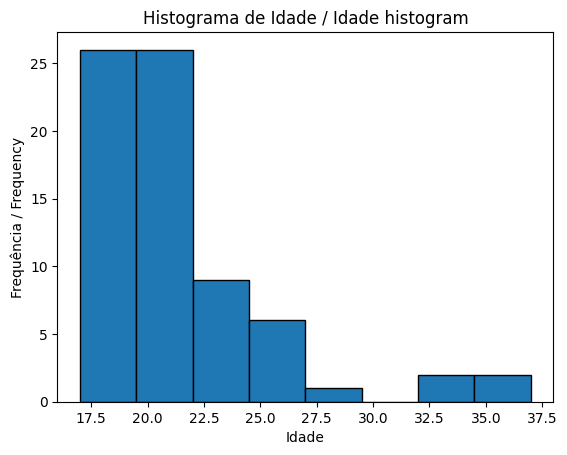

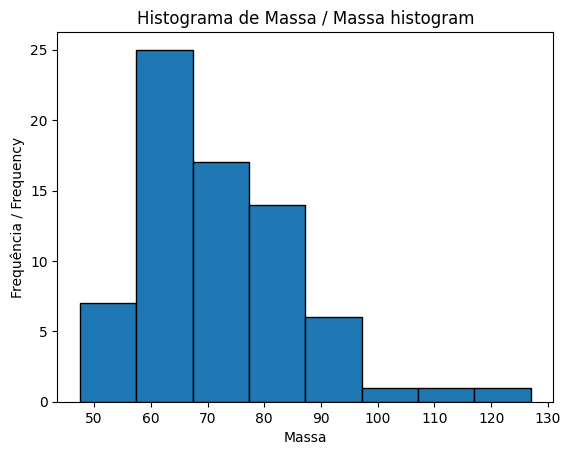

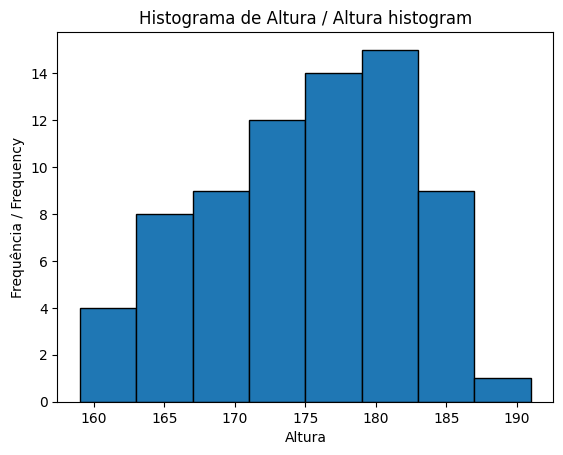

In [ ]:
# ============================================
# Exercício 2.1: Histogramas (Idade, Massa, Altura)
# Exercise 2.1: Histograms (Age, Mass, Height)
# ============================================

for col in ["Idade", "Massa", "Altura"]:
    # Cria uma nova figura para cada variável
    # Create a new figure for each variable
    plt.figure()

    # Constrói o histograma da coluna (usando regra de Sturges p/ nº de classes)
    # Build histogram of the column (using Sturges rule for number of bins)
    plt.hist(tabela1[col], bins='sturges', edgecolor='black')

    # Define o título combinando PT/EN
    # Set the title (PT/EN)
    plt.title(f"Histograma de {col} / {col} histogram")

    # Define o rótulo do eixo X
    # Label for x-axis
    plt.xlabel(col)

    # Define o rótulo do eixo Y
    # Label for y-axis
    plt.ylabel("Frequência / Frequency")

    # Exibe o gráfico na tela
    # Show the figure
    plt.show()


Número de medidas: 30


,count,mean,std,min,25%,50%,75%,max
Tabela 2 – Bancadas,30.0,150.223333,0.523044,149.2,150.0,150.1,150.3,151.5


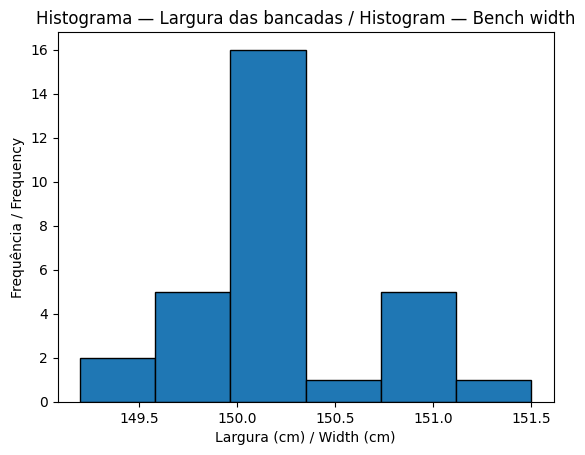

,count
Tabela 2 – Bancadas,
"(149.198, 149.583]",2
"(149.583, 149.967]",5
"(149.967, 150.35]",16
"(150.35, 150.733]",1
"(150.733, 151.117]",5
"(151.117, 151.5]",1


In [ ]:
# ============================================
# Exercício 2.2: Histograma (Tabela 2 – Largura das bancadas)
# Exercise 2.2: Histogram (Table 2 – Bench width)
# ============================================

import numpy as np
import matplotlib.pyplot as plt

# Verificação rápida: nº de medidas e estatísticas básicas
# Quick check: number of values and basic statistics
print(f"Número de medidas: {len(tabela2)}")
# Converte para DataFrame para não mostrar 'dtype'
display(pd.DataFrame(tabela2.describe()).T)

# Constrói o histograma das larguras (Sturges = nº de classes automático)
plt.figure()
plt.hist(tabela2, bins="sturges", edgecolor="black")
plt.title("Histograma — Largura das bancadas / Histogram — Bench width")
plt.xlabel("Largura (cm) / Width (cm)")
plt.ylabel("Frequência / Frequency")
plt.show()

# Frequência agrupada por classes (usando regra de Sturges)
k = int(np.ceil(1 + np.log2(tabela2.size)))
freq_classes = pd.cut(tabela2, bins=k).value_counts().sort_index()
# Também converte para DataFrame para não mostrar 'dtype'
display(pd.DataFrame(freq_classes))

In [ ]:
# ============================================
# 3) Parâmetros de Posição / Position parameters
# (aplica em: Idade, Massa, Altura da Tabela 1)
# ============================================

import numpy as np
import pandas as pd

# Função que calcula média, moda, RMS e mediana para uma série numérica
# Function that computes mean, mode, RMS and median for a numeric series
def position_params(series: pd.Series) -> pd.Series:
    # Média aritmética / Arithmetic mean
    mean_ = series.mean()
    # Moda (pega a primeira se houver múltiplas) / Mode (first if multiple)
    mode_ = series.mode().iloc[0] if not series.mode().empty else np.nan
    # Média quadrática (RMS) / Quadratic mean (RMS)
    rms_ = np.sqrt(np.mean(series**2))
    # Mediana / Median
    median_ = series.median()
    # Retorna como linha nomeada / Return as labeled row
    return pd.Series({
        "Média / Mean": mean_,
        "Moda / Mode": mode_,
        "RMS": rms_,
        "Mediana / Median": median_
    })

# Aplica a função a cada coluna pedida (Idade, Massa, Altura)
# Apply the function to each requested column
cols = ["Idade", "Massa", "Altura"]
pos_table = tabela1[cols].apply(position_params)

# Mostra a tabela resumo (linhas = métricas, colunas = variáveis)
# Show the summary table (rows = metrics, columns = variables)
display(pos_table)


,Idade,Massa,Altura
Média / Mean,21.333333,71.986111,174.333333
Moda / Mode,19.000000,60.000000,172.000000
RMS,21.712771,73.351628,174.482330
Mediana / Median,20.000000,68.250000,175.000000


3.1) Média / Mean

In [ ]:
# 3.1) Média / Mean
# Extrai apenas as médias da tabela já calculada
# Extract only means from the computed table
means = pos_table.loc["Média / Mean"]
print("Médias (Idade, Massa, Altura) / Means (Age, Mass, Height):")

# Converte para DataFrame para evitar a linha 'dtype'
display(pd.DataFrame(means))

Médias (Idade, Massa, Altura) / Means (Age, Mass, Height):


,Média / Mean
Idade,21.333333
Massa,71.986111
Altura,174.333333


3.2) Moda / Mode

In [ ]:
# 3.2) Moda / Mode
# Extrai apenas as modas da tabela já calculada
# Extract only modes from the computed table
modes = pos_table.loc["Moda / Mode"]
print("Modas (Idade, Massa, Altura) / Modes (Age, Mass, Height):")

# Converte para DataFrame para remover 'dtype' na saída
display(pd.DataFrame(modes))

Modas (Idade, Massa, Altura) / Modes (Age, Mass, Height):


,Moda / Mode
Idade,19.0
Massa,60.0
Altura,172.0


3.3) Média quadrática (RMS) / Quadratic mean (RMS)

In [ ]:
# 3.3) Média quadrática (RMS) / Quadratic mean (RMS)
# Extrai apenas as médias quadráticas da tabela já calculada
# Extract only RMS values from the computed table
rms_vals = pos_table.loc["RMS"]
print("RMS (Idade, Massa, Altura):")

# Converte para DataFrame para remover 'dtype' na saída
display(pd.DataFrame(rms_vals))

RMS (Idade, Massa, Altura):


,RMS
Idade,21.712771
Massa,73.351628
Altura,174.482330


3.4) Mediana / Median

In [ ]:
# 3.4) Mediana / Median
# Extrai apenas as medianas da tabela já calculada
# Extract only medians from the computed table
medians = pos_table.loc["Mediana / Median"]
print("Medianas (Idade, Massa, Altura) / Medians (Age, Mass, Height):")

# Converte para DataFrame para remover 'dtype' da saída
display(pd.DataFrame(medians))

Medianas (Idade, Massa, Altura) / Medians (Age, Mass, Height):


,Mediana / Median
Idade,20.00
Massa,68.25
Altura,175.00


4 – Determinar os parâmetros de dispersão:

41. – Amplitude
42. – Desvio médio
43. – Variância
44. – Desvio padrão
45. – Largura a meia altura

In [ ]:
# ============================================
# 4) Parâmetros de Dispersão / Dispersion parameters
# (Amplitude, Desvio médio, Variância, Desvio padrão, FWHM)
# Applies to: Idade, Massa, Altura (Tabela 1)
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Função para calcular as métricas de dispersão de uma série numérica
# Function to compute dispersion metrics for a numeric series
def dispersion_params(series: pd.Series) -> pd.Series:
    # Amplitude = max - min / Range
    rng = series.max() - series.min()

    # Desvio médio absoluto em relação à média / Mean absolute deviation from mean
    mean_abs_dev = (series - series.mean()).abs().mean()

    # Variância (amostral, ddof=1) / Sample variance (ddof=1)
    var_ = series.var(ddof=1)

    # Desvio padrão (amostral, ddof=1) / Sample standard deviation (ddof=1)
    std_ = series.std(ddof=1)

    # FWHM aproximada a partir do histograma (regra de Sturges p/ nº de classes)
    # Approximate FWHM from histogram (Sturges rule for number of bins)
    counts, edges = np.histogram(series, bins='sturges')
    halfmax = counts.max() / 2.0
    # Índices dos bins com contagem >= metade do máximo / indices of bins >= half max
    above = np.where(counts >= halfmax)[0]
    if len(above) >= 1:
        # Largura entre a borda direita do último bin acima e a borda esquerda do primeiro
        # Width between right edge of last above-bin and left edge of first
        fwhm = edges[above[-1] + 1] - edges[above[0]]
    else:
        fwhm = np.nan

    # Retorna as métricas organizadas / Return organized metrics
    return pd.Series({
        "Amplitude / Range": rng,
        "Desvio médio / Mean abs dev": mean_abs_dev,
        "Variância / Variance": var_,
        "Desvio padrão / Std dev": std_,
        "Largura a meia altura / Full Width at Half Maximum [FWHM] (aprox)": fwhm
    })

# Aplica às colunas solicitadas de Tabela 1
# Apply to requested columns from Table 1
cols = ["Idade", "Massa", "Altura"]
disp_table = tabela1[cols].apply(dispersion_params)

# Mostra tabela final (linhas = métricas; colunas = variáveis)
# Show final table (rows = metrics; columns = variables)
display(disp_table)

,Idade,Massa,Altura
Amplitude / Range,20.000000,79.500000,32.000000
Desvio médio / Mean abs dev,2.675926,10.983796,6.000000
Variância / Variance,16.563380,201.256424,52.704225
Desvio padrão / Std dev,4.069813,14.186487,7.259768
Largura a meia altura / Full Width at Half Maximum [FWHM] (aprox),5.000000,29.812500,24.000000


5) Parâmetros de Correlação / Correlation parameters

In [ ]:
# ============================================
# 5) Parâmetros de Correlação / Correlation parameters
# ============================================

pairs = [("Idade", "Altura"), ("Idade", "Massa"), ("Altura", "Massa")]
cov_results = {}
corr_results = {}

for a, b in pairs:
    cov_ab = tabela1[[a, b]].cov().iloc[0, 1]
    r_ab   = tabela1[[a, b]].corr().iloc[0, 1]
    cov_results[f"{a} × {b}"] = cov_ab
    corr_results[f"{a} × {b}"] = r_ab

In [ ]:
# -------------------------------
# 5.1) Covariância / Covariance
# -------------------------------
print("=== 5.1) Covariâncias / Covariances ===")
display(pd.DataFrame.from_dict(cov_results, orient="index", columns=["Covariância"]))

=== 5.1) Covariâncias / Covariances ===


,Covariância
Idade × Altura,4.239437
Idade × Massa,10.041315
Altura × Massa,65.682160


In [ ]:
# -------------------------------
# 5.2) Coeficiente de correlação linear (Pearson r)
# 5.2) Linear correlation coefficient (Pearson r)
# -------------------------------
print("=== 5.2) Correlações (Pearson r) / Correlations (Pearson r) ===")
display(pd.DataFrame.from_dict(corr_results, orient="index", columns=["Correlação"]))

=== 5.2) Correlações (Pearson r) / Correlations (Pearson r) ===


,Correlação
Idade × Altura,0.143486
Idade × Massa,0.173917
Altura × Massa,0.637749
